In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')


def calc_mdd(list_x, list_pv):
    """
    MDD(Maximum Draw-Down) 계산
    :param list_pv: 포트폴리오 가치 리스트
    :return:
    """
    list_x = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in list_x]
    arr_pv = np.array(list_pv)
    peak_lower = np.argmax(np.maximum.accumulate(arr_pv) - arr_pv)
    peak_upper = np.argmax(arr_pv[:peak_lower])
    
    idx_min = np.argmin(arr_pv)
    idx_max = np.argmax(arr_pv)

    # ------------------------------
    fig, ax = plt.subplots()
    ax.plot(list_x, arr_pv, color='gray')
#     ax.plot([list_x[peak_upper]], [arr_pv[peak_upper]], '>', color='red')
#     ax.plot([list_x[peak_lower]], [arr_pv[peak_lower]], '<', color='blue')
    ax.plot([list_x[peak_upper], list_x[peak_lower]], [arr_pv[peak_upper], arr_pv[peak_lower]], '-', color='blue')
    ax.plot([list_x[idx_min]], [arr_pv[idx_min]], 'v', color='blue')
    ax.plot([list_x[idx_max]], [arr_pv[idx_max]], '^', color='red')
    
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_locator(months)  
    
    plt.show()
    # ------------------------------

    return (arr_pv[peak_lower] - arr_pv[peak_upper]) / arr_pv[peak_upper]


In [2]:
import sys
import os
import pandas as pd
sys.path.append(os.path.dirname(os.getcwd()))

In [3]:
import data_manager

In [4]:
# code = '005930'  # 삼성전자
# code = '000660'  # SK하이닉스
# code = '005380'  # 현대차
# code = '051910'  # LG화학
# code = '035420'  # NAVER
code = '030200'  # KT

In [5]:
chart_data = data_manager.load_chart_data('chart_data/{}.csv'.format(code))
chart_data = chart_data[chart_data['date'] <= '2016-12-31']
chart_data.tail()

,date,open,high,low,close,volume
4450,2016-12-23,30050,30400,30000,30250,346657
4451,2016-12-26,30250,30350,30150,30250,289098
4452,2016-12-27,30200,30300,30150,30200,544322
4453,2016-12-28,29800,29850,29600,29600,453869
4454,2016-12-29,29750,29750,29400,29400,372667


33250
26350


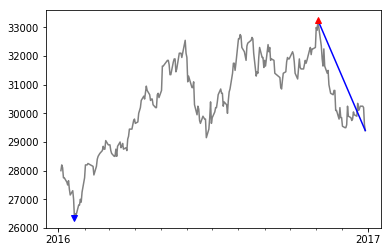

-0.11578947368421053


In [6]:
_chart_data = chart_data[(chart_data['date'] >= '2016-01-01') & (chart_data['date'] <= '2016-12-31')]
print(_chart_data['close'].max())
print(_chart_data['close'].min())
print(calc_mdd(_chart_data['date'], _chart_data['close']))

In [7]:
chart_data.tail()

,date,open,high,low,close,volume
8546,2016-12-23,143000,144000,142000,144000,357914
8547,2016-12-26,143500,145000,143500,144500,206099
8548,2016-12-27,144500,145000,144000,144500,337224
8549,2016-12-28,142500,144000,141500,143500,377265
8550,2016-12-29,142500,146000,142000,146000,381283


In [8]:
preprocessed_chart_data = data_manager.preprocess(chart_data)
preprocessed_chart_data[['close_ma5', 'volume_ma5', 'close_ma10', 'volume_ma10', 'close_ma20', 'volume_ma20', 'close_ma60', 'volume_ma60', 'close_ma120', 'volume_ma120']].tail()

,close_ma5,volume_ma5,close_ma10,volume_ma10,close_ma20,volume_ma20,close_ma60,volume_ma60,close_ma120,volume_ma120
8546,143000.0,339163.8,142950.0,342871.7,139525.0,425157.25,136616.666667,460799.783333,135725.000000,497759.000000
8547,143500.0,321610.0,142950.0,325673.9,140000.0,422645.15,136766.666667,453939.233333,135787.500000,495151.650000
8548,143700.0,309152.6,142900.0,331003.0,140500.0,423895.55,136858.333333,447766.933333,135866.666667,494717.958333
8549,143700.0,322568.0,142900.0,342591.1,141025.0,383320.45,136916.666667,444894.583333,135979.166667,488708.891667
8550,144500.0,331957.0,143300.0,352145.7,141725.0,378466.50,137033.333333,446719.166667,136104.166667,488958.650000


In [9]:
pd.set_option('display.max_columns', 500)
training_data = data_manager.build_training_data(preprocessed_chart_data)
training_data[['open_lastclose_ratio', 'high_close_ratio', 'low_close_ratio', 'close_lastclose_ratio', 'volume_lastvolume_ratio']].tail()

,open_lastclose_ratio,high_close_ratio,low_close_ratio,close_lastclose_ratio,volume_lastvolume_ratio
8546,0.007042,0.000000,-0.013889,0.014085,0.070515
8547,-0.003472,0.003460,-0.006920,0.003472,-0.424166
8548,0.000000,0.003460,-0.003460,0.000000,0.636223
8549,-0.013841,0.003484,-0.013937,-0.006920,0.118737
8550,-0.006969,0.000000,-0.027397,0.017422,0.010650


In [10]:
training_data[['close_ma5_ratio', 'volume_ma5_ratio', 'close_ma10_ratio', 'volume_ma10_ratio', 'close_ma20_ratio', 'volume_ma20_ratio']].tail()

,close_ma5_ratio,volume_ma5_ratio,close_ma10_ratio,volume_ma10_ratio,close_ma20_ratio,volume_ma20_ratio
8546,0.006993,0.055284,0.007345,0.043872,0.032073,-0.158161
8547,0.006969,-0.359165,0.010843,-0.367161,0.032143,-0.512359
8548,0.005567,0.090801,0.011197,0.018794,0.028470,-0.204464
8549,-0.001392,0.169567,0.004199,0.101211,0.017550,-0.015797
8550,0.010381,0.148592,0.018842,0.082742,0.030164,0.007442


In [11]:
training_data[['close_ma60_ratio', 'volume_ma60_ratio', 'close_ma120_ratio', 'volume_ma120_ratio']].tail()

,close_ma60_ratio,volume_ma60_ratio,close_ma120_ratio,volume_ma120_ratio
8546,0.054044,-0.223277,0.060969,-0.280949
8547,0.056544,-0.545977,0.064163,-0.583766
8548,0.055836,-0.246876,0.063543,-0.318351
8549,0.048083,-0.152013,0.055309,-0.228037
8550,0.065434,-0.146482,0.072708,-0.220214


In [12]:
len(training_data[(training_data['date'] >= '2017-01-01') & (training_data['date'] <= '2017-12-31')])

0